In [23]:
import fastf1
from fastf1 import plotting
fastf1.Cache.enable_cache('cache')
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

from datetime import datetime
from matplotlib import pyplot as plt

In [34]:
# getting the race

today = datetime.today()
year = 2024
circuit = "Brazil"
event = 'R' # race

race = fastf1.get_session(year, circuit, event)
race.load()

core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.5.2]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No 

In [56]:
laps = race.laps.pick_drivers("NOR")

laps.iloc[0]

Time                      0 days 01:13:26.849000
Driver                                       NOR
DriverNumber                                   4
LapTime                   0 days 00:01:31.803000
LapNumber                                    1.0
Stint                                        1.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time                                  NaT
Sector2Time               0 days 00:00:45.586000
Sector3Time               0 days 00:00:18.477000
Sector1SessionTime                           NaT
Sector2SessionTime        0 days 01:13:08.479000
Sector3SessionTime        0 days 01:13:26.987000
SpeedI1                                    293.0
SpeedI2                                    208.0
SpeedFL                                    299.0
SpeedST                                    178.0
IsPersonalBest                             False
Compound                            INTERMEDIATE
TyreLife            

req            INFO 	Using cached data for driver_info


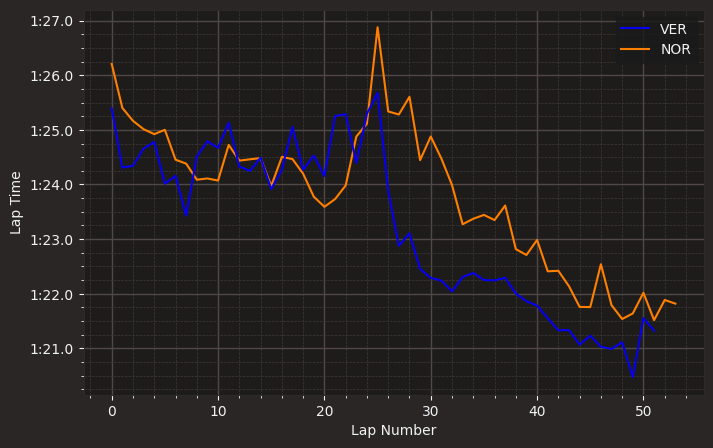

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('NOR', 'VER'):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=race)
    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plotting.add_sorted_driver_legend(ax, race)
